In [6]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import accuracy_score
from skimage.color import rgb2grey
from skimage import img_as_ubyte

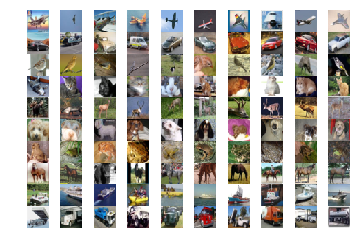

In [2]:
index = pd.read_csv(os.path.join('data','index.csv'))
labels = index['label'].unique()
fig, axes = plt.subplots(10, 10)
for label in labels:
    selected_images = index[index['label']==label].sample(10)
    for i in range(10):
        img = np.load(os.path.join('data','images',selected_images['filename'].iloc[i]+'.npy'))
        axes[label, i].imshow(img)
        axes[label, i].axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [13]:
def get_hog_features(filename):
    img = np.load(os.path.join('data', 'images', filename + '.npy'))
    return hog(img, block_norm='L2', orientations=9, 
               pixels_per_cell=(8,8), cells_per_block=(2,2), transform_sqrt=True, multichannel=True)

index['hog'] = index['filename'].apply(get_hog_features)
X_train = np.stack(index.loc[index['is_test'] == 0,]['hog'].tolist(), axis=0)
X_test = np.stack(index.loc[index['is_test']  == 1,]['hog'].tolist(), axis=0)
Y_train = index.loc[index['is_test']  == 0, ]['label'].tolist()
Y_test = index.loc[index['is_test']  == 1, ]['label'].tolist()

In [14]:
print(X_train.shape)

(50000, 324)


In [15]:
base_clf = svm.LinearSVC(C=1)
base_clf.fit(X_train, Y_train)
predictions = base_clf.predict(X_test)
print(base_clf.score(X_train, Y_train))
print(base_clf.score(X_test, Y_test))

0.56296
0.5496
